In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np

nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [3]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=007a059d9e85677d591ae5afc1a0d1e3586b52c88b4fadb3e330cd896aeb5850
  Stored in directory: /root/.cache/pip/wheels/15/0c/b3/674aea8c5d91c642c817d4d630bd58faa316724b136844094d
Successfully built utils


In [28]:
# Import necessary libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data (punkt and punkt_tab)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Function to preprocess a tweet
def process_tweet(tweet):
    """
    Preprocess a tweet by:
    - Lowercasing
    - Removing URLs, hashtags, mentions, and special characters
    - Tokenizing into words
    - Removing stopwords and punctuation

    Args:
        tweet (str): The tweet to be processed.

    Returns:
        list: A list of processed words.
    """
    # Lowercase the tweet
    tweet = tweet.lower()

    # Remove URLs, hashtags, and mentions
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'#\w+', '', tweet)

    # Remove punctuation and special characters
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the tweet into words
    words = word_tokenize(tweet)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return words

# Function to build a frequency dictionary
def build_freqs(tweets, labels):
    """
    Build a frequency dictionary that maps each (word, sentiment) pair to its frequency.

    Args:
        tweets (list): A list of tweets.
        labels (list): A list of labels corresponding to the tweets (1 for positive, 0 for negative).

    Returns:
        dict: A dictionary mapping (word, sentiment) pairs to their frequencies.
    """
    freqs = {}

    for tweet, label in zip(tweets, labels):
        # Process the tweet
        words = process_tweet(tweet)

        for word in words:
            # Update the frequency dictionary
            pair = (word, label)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

# Example usage
if __name__ == "__main__":
    # Example tweets and labels
    tweets = [
        "I love this song! ❤",
        "This is a bad idea :(",
        "What a magnificent play! 😍",
        "I'm so sad about this 😒"
    ]

    labels = [1, 0, 1, 0]  # 1 for positive, 0 for negative

    # Build the frequency dictionary
    freqs = build_freqs(tweets, labels)

    # Print the frequency dictionary
    print("Frequency Dictionary:")
    for key, value in freqs.items():
        print(f"{key}: {value}")

Frequency Dictionary:
('love', 1): 1
('song', 1): 1
('❤', 1): 1
('bad', 0): 1
('idea', 0): 1
('magnificent', 1): 1
('play', 1): 1
('😍', 1): 1
('im', 0): 1
('sad', 0): 1
('😒', 0): 1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets

print("Number of tweets:", len(tweets))

Number of tweets: 10000


In [9]:
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

In [10]:
dictionary = {
    'key1': 1,
    'key2': 2
}

In [12]:
dictionary['key3'] = -5

dictionary['key1'] = 0

In [13]:
print(dictionary)

{'key1': 0, 'key2': 2, 'key3': -5}


In [14]:
print(dictionary['key2'])

2


In [17]:
if 'key1' in dictionary:
  print("Item found:", dictionary['key1'])
else:
  print("Item not found")

Item found: 0


In [18]:
if 'key7' in dictionary:
  print("Item found:", dictionary['key7'])
else:
  print("Item not found")

print(dictionary.get('key7', -1))

Item not found
-1


In [30]:
freqs = build_freqs(tweets, labels)

print(f'type(freqs) = {type(freqs)}')
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 25


In [31]:
print(freqs)

{('top', 1): 1, ('engaged', 1): 1, ('members', 1): 1, ('community', 1): 1, ('week', 1): 1, ('hey', 0): 1, ('james', 0): 1, ('odd', 0): 1, ('please', 0): 1, ('call', 0): 1, ('contact', 0): 1, ('centre', 0): 1, ('02392441234', 0): 1, ('able', 0): 1, ('assist', 0): 1, ('many', 0): 1, ('thanks', 0): 1, ('listen', 1): 1, ('last', 1): 1, ('night', 1): 1, ('bleed', 1): 1, ('amazing', 1): 1, ('track', 1): 1, ('scotland', 1): 1, ('congrats', 0): 1}


In [32]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:

    # initialize positive and negative counts
    pos = 0
    neg = 0

    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]

    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]

    # append the word counts to the table
    data.append([word, pos, neg])

data

[['happi', 0, 0],
 ['merri', 0, 0],
 ['nice', 0, 0],
 ['good', 0, 0],
 ['bad', 0, 0],
 ['sad', 0, 0],
 ['mad', 0, 0],
 ['best', 0, 0],
 ['pretti', 0, 0],
 ['❤', 0, 0],
 [':)', 0, 0],
 [':(', 0, 0],
 ['😒', 0, 0],
 ['😬', 0, 0],
 ['😄', 0, 0],
 ['😍', 0, 0],
 ['♛', 0, 0],
 ['song', 0, 0],
 ['idea', 0, 0],
 ['power', 0, 0],
 ['play', 0, 0],
 ['magnific', 0, 0]]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


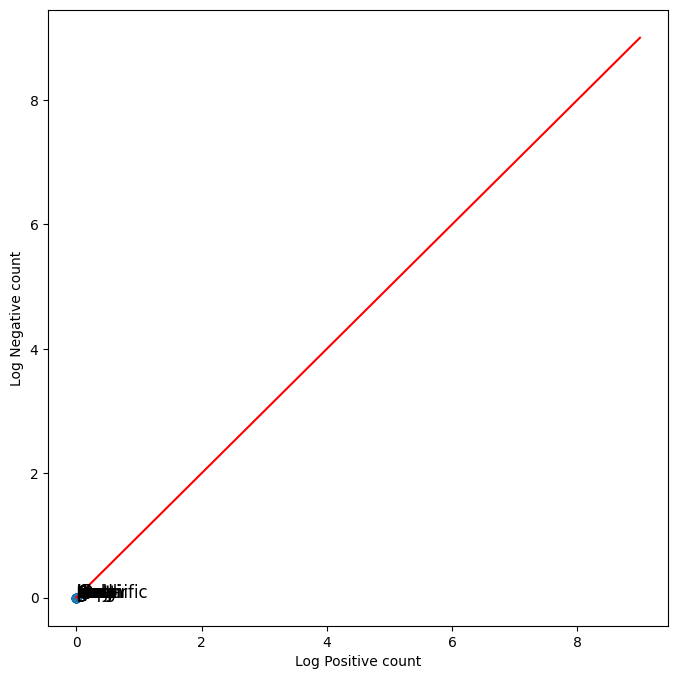

In [33]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data])

# Plot a dot for each pair of words
ax.scatter(x, y)

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()